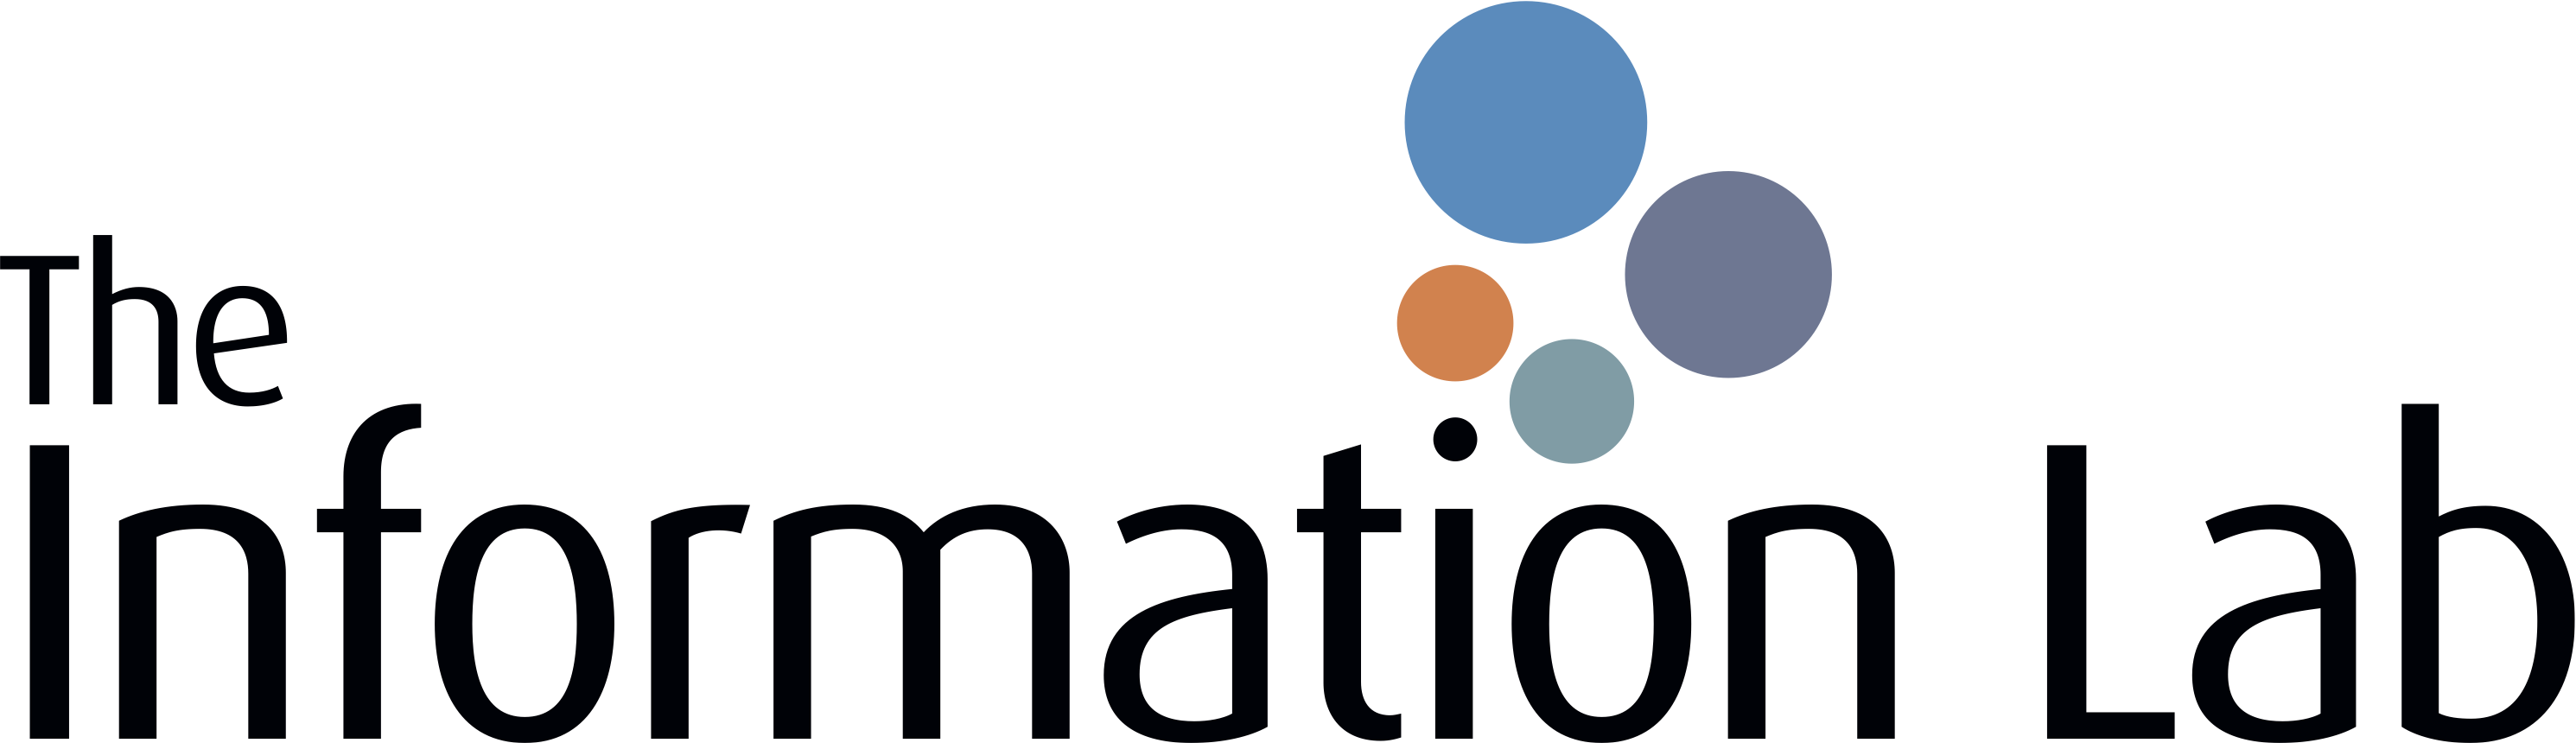

# Introductie

Voor deze oefening maken we gebruiken van de Kernel die beschikbaar is op Kaggle (https://www.kaggle.com/c/titanic/overview). Deze set wordt vaak gebruikt als oefen materiaal en is toegespitst op verkennende gegevensanalyse en Feature Engineering. Deze guide is geinspireerd door Titanic - Advanced Feature Engineering , te vinden op Kaggle (https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial/notebook)

# Dataset verkenning

Als eerste stap gaan we bekijken welke informatie we tot onze beschikking hebben. De kernel zelf is al voor ons opgedeeld in 2 gedeelte :

- train.csv , de trainingset die we gaan gebruiken om ons model te trainen.
- test.csv , de testset die we gaan gebruiken. Hiervan willen we dus de uitkomst achterhalen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

De eerste stap is het omzetten van de 2 losse csv bestanden naar een Pandas Dataframe. Iets wat te vergelijken is met een tabel. Dit gebeurt als volgt : 

In [2]:
df_train = pd.read_csv('https://www.theinformationlab.nl/wp-content/uploads/2020/07/train.csv')
df_test = pd.read_csv('https://www.theinformationlab.nl/wp-content/uploads/2020/07/test.csv')
frames = [df_train,df_test]
df_all = pd.concat(frames,sort=False).reset_index()
dfs = [df_train, df_test]

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'Complete Set' 



We hebben nu 3 dataframes : 
- df_train, een dataframe met alle trainingsdata.
- df_test , een dataframe met alle testdata.
- df_all , een dataframe met alle data uit zowel df_train als df_test

Tijd om deze datasets nu te gaan verkennen en de gegevens van onze dataframes op te vragen. Dit kunnen we als volgt doen : 

In [3]:
print('Training  Shape = {}'.format(df_train.shape))
print('Test  Shape = {}'.format(df_test.shape))

print('Aantal Trainings Voorbeelden = {}'.format(df_train.shape[0]))
print('Aantal Test Voorbeelden = {}\n'.format(df_test.shape[0]))

print(df_train.columns)
print(df_test.columns)

Training  Shape = (891, 12)
Test  Shape = (418, 11)
Aantal Trainings Voorbeelden = 891
Aantal Test Voorbeelden = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


We zien nu , netjes onder elkaar (en op meerdere manieren) , verschillende soorten gegevens. Wat we nu weten is : 

df.shape geeft de vorm weer van het dataframe , hoeveel rijen en hoeveel kolommen bevat het dataframe?
- de trainingset bestaat uit 891 rijen en 12 kolommen , test uit 418 en 11 kolommen

df.shape[0] geeft het eerste stukje informatie uit de verzameling weer. In het geval van shape is dit het aantal rijen.
- de trainingset bestaat uit 891 rijen , test uit 418

df.columns geeft de informatie terug over de kolomnamen in het dataframe
- de trainingset bevat 1 kolom meer dan de trainingset: "Survived"


## Verkennende Gegevensanalyse

We gaan nu kijken naar de inhoud van de datasets , welke informatie staat tot onze beschikking?
Een manier om even in je dataset te spieken is df.sample():

In [4]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
664,665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.925,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.000,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.225,NaN,C
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.500,NaN,S


### PassengerId

PassengerId lijkt op een uniek passagiersID maar zeker weten doen we dit niet, tenzij we het zelf achterhalen. Dit kunnen we doen door alle waarden in een set te plaatsen. Een set bevat namelijk enkel unieke waarde ; als deze set vervolgens even lang is als het aantal waarden die we tot onze beschikking hebben, dan zijn we zeker van een unieke lijst.
Het omvormen van een lijst naar een set wordt gedaan dmv {*lijstnaam}

In [5]:
passagierlijst = df_train['PassengerId'].unique()
passagierset = {*passagierlijst}
if len(passagierlijst) == len(passagierset):
    print("lijst met alleen maar unieken")
else:
    print("lijst is niet uniek")

lijst met alleen maar unieken


We zijn nu dus zeker van een compleet unieke lijst!

### Survived

We zien in de sample maar 2 verschillende waardes voorbij komen, 0 en 1 , waarbij 1 voor "overleefd" zou moeten staan. Meten is echter weten, hiervoor gebruiken we unique() om alle unieke waarden op te vragen in de kolom : 

In [6]:
df_train['Survived'].unique()

array([0, 1])

er komen maar 2 verschillende waarde voor : 0 en 1 , zoals verwacht.

1 = overleefd

0 = niet overleefd

### Pclass

Hierin zouden we verschillende ticketklassen moeten staan. Meten is opnieuw weten :

In [7]:
df_train['Pclass'].unique()

array([3, 1, 2])

Hierin zien we dus de waarden 1,2,3 welk elke de klasse van vervoer aangeeft.

1 = eerste klasse

2 = tweede klasse

3 = derde klasse

### Name

Dit onderdeel is aardig vanzelf sprekend ; Naam van de passagier maar misscien zit hier nog wel meerdere stukken data verborgen.

In [8]:
df_train['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

Mogelijk bruikbare informatie : 
- Miss en Mrs , een onderscheidt tussen gehuwd en niet gehuwd
- "Master", een term voor jonge jongens
- Col. en Ref. als titels

### Sex

Ook deze spreekt aardig voor zich. 

In [9]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

### Age

Leeftijd van de passagiers.

In [10]:
df_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Hier zien we al wat onverwachte waarden zoals nan halve jaren maar verwondelijker zijn de waardes 0.67, 0.42
We kunnen dit onderzoeken op 2 verschillende manier : 


Op zoek naar records met een specifieke waarde in een kolom:

In [11]:
df_train.loc[df_train['Age'] == 0.42]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


Een andere optie is zoeken naar records met een of meerdere specifieke waarde in een kolom waarin we de gezochte waardes verzamelen in een set:

In [12]:
set = [0.67,0.42]
df_train.loc[df_train['Age'].isin(set)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


We zien bij deze leeftijden de titel "Master" staan, dit is een aanduiding voor kinderen. De leeftijden zijn dus erg specifiek maar lijken te verder te kloppen.


Naast deze 'onverwachte' waarden zien we ook nan voorbij komen. Dit staat voor Not a Number. Dit zal een leeg veld zijn die we zullen moeten gaan opvullen.

### SibSp

Het totale aantal van broers/zussen en echtgenoten/echtgenotes aan boord van de specifieke passagiers:

In [13]:
df_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

### Parch

Het totale aantal van ouders en kinderen aan boord van de specifieke passagiers:

In [14]:
df_train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

### Ticket

Het ticketnummer van de passagiers:

In [15]:
df_train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

We zien dat dit niet enkel nummers zijn, als we dit willen gaan gebruiken, dan moet er het 1 en ander worden schoongemaakt als we deze willen gebruiken.

### Fare

De prijs van het gekochte ticket:

In [16]:
df_train['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

### Cabin

Het cabine nummer , gekoppeld aan het ticket.

In [17]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

We zien hier ook nan of "Not a Number" voorbij komen. 

### Embarked

Het opstappunt van de passagier

In [18]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

hier zitten 4 unieke waarden in : 
- C = Cherbourg
- Q = Queenstown
- S = Southampton
- nan = Not a Number / leeg veld

## Missende waardes opvullen

We hebben al gezien dat er sommige waarden missen in onze trainingset. Om het model zo goed mogelijk te trainen, zullen we deze eerst moeten opvullen.

We kunnen snel achterhalen welke kolommen waardes missen met behulp van isnull() en een for-loop.

De loop werkt als volgt :

Voor {elke kolom} in df_train.columns doe het volgende : 

print X1 aantal missende waarden: X2. 

x1 = {de gebruikte kolom in de loop}  

x2 = zoek de null waarden van {de gebruikte kolom in de loop} en tel ze op.

In [19]:
for col in df_train.columns.tolist():          
    print('{} aantal missende waarden: {}'.format(col, df_train[col].isnull().sum()))

PassengerId aantal missende waarden: 0
Survived aantal missende waarden: 0
Pclass aantal missende waarden: 0
Name aantal missende waarden: 0
Sex aantal missende waarden: 0
Age aantal missende waarden: 177
SibSp aantal missende waarden: 0
Parch aantal missende waarden: 0
Ticket aantal missende waarden: 0
Fare aantal missende waarden: 0
Cabin aantal missende waarden: 687
Embarked aantal missende waarden: 2


In [20]:
for col in df_test.columns.tolist():          
    print('{} aantal missende waarden: {}'.format(col, df_test[col].isnull().sum()))

PassengerId aantal missende waarden: 0
Pclass aantal missende waarden: 0
Name aantal missende waarden: 0
Sex aantal missende waarden: 0
Age aantal missende waarden: 86
SibSp aantal missende waarden: 0
Parch aantal missende waarden: 0
Ticket aantal missende waarden: 0
Fare aantal missende waarden: 1
Cabin aantal missende waarden: 327
Embarked aantal missende waarden: 0


Hieruit kunnen we opmaken dat er een aantal missende waarden zijn in de verschillende sets:
- Training heeft missende waarde in Age , Cabin en Embarked
- Test heeft missende waarde in Age, Fare en Cabin

Wanneer je missende waardes gaat opvullen, is het verstandig om tegelijkertijd gebruik te maken van zowel je training als test set. Dit zorgt ervoor dat je de opgevulde waarden niet te veel kijken naar de set waarin ze worden geplaatst maar rekening houden met het geheel. Als dit niet gebeurt , kan er "overfitting" plaats vinden waardoor je getrainde model te veel getrained is op z'n trainingsset waardoor de "echte" data die je wilt voorspellen niet goed kan worden benaderd.

We zien 2 grote verschillen in het aantal ; Cabin heeft in verhouding met het totaal , een hoog aantal missende waarden waardoor een statistische benadering niet mogelijk is. De overige kolomen zitten echter veel lager hierin waardoor een statistische benadering wel mogelijk is.

Door het hoge aantal missende Cabins is het in ons geval misschien zelfs wijs om deze kolom in zijn geheel te laten vallen.E r is een zaak te maken voor het behoudt hiervan maar gezien het instap niveau van dit project gaan we deze toch verwijderen uit onze dataset.


Verwijderen doen we met behulp van .drop. Om Python te laten weten wat we kwijt willen kunnen we plaats bepaling gebruiken (kolom nummer X of rij nummer X) maar veiliger is om dit met naamsaanduiding te doen. In ons geval is dit de kolom 'Cabin' die te vinden is op de kolom as, axis = 1.

Hierna slaan we de nieuwe tabel (dus zonder Cabin) ook weer direct op als df_all

In [21]:
df_all=df_all.drop('Cabin',axis=1)

### Age

We hebben dus gezien dat Age een aantal leeftijden mist. We kunnen ervoor kiezen om dit op te laten vullen door een gemiddelde van alle leeftijden maar misschien kunnen we iets specifieker worden. We gaan eerst kijken welke kolommen een correlatie hebben met deze kolom. We gebruiken hiervoor corr() die vervolgens nog wat wordt aangepakt : 

In [22]:
df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlatie Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlatie Coefficient
5,Age,Age,1.000000
11,Age,Pclass,0.408106
18,Age,SibSp,0.243699
22,Age,Fare,0.178740
28,Age,Parch,0.150917
33,Age,Survived,0.077221
45,Age,PassengerId,0.028814
52,Age,index,0.012723


- df_all.corr() , zoekt naar correlatie tussen de 2 kolommen.
- .abs() , geeft enkel absolute (niet negatieve) getallen , -1 wordt 1. Dit omdat de correlatie ook geldig is als deze negatief is.
- unstack().sort_values(kind="quicksort", ascending=False).reset_index(),
- df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index(), zet de resultaten onder elkaar
- df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True), corr() geeft normaal de titels level_0, om dit iets meer leesbaar te maken , krijgen deze andere titels.

We zien dat Pclass een hoge coefficient heeft met Age. Als we dit vervolgens ook gaan vergelijken met Survived : 

In [23]:
df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlatie Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Survived']

,Feature 1,Feature 2,Correlatie Coefficient
3,Survived,Survived,1.000000
14,Survived,Pclass,0.338481
16,Survived,Fare,0.257307
31,Survived,Parch,0.081629
32,Survived,Age,0.077221
40,Survived,SibSp,0.035322
56,Survived,index,0.005007
58,Survived,PassengerId,0.005007


We zien dat Pclass hier ook een hoge coefficient heeft met Survived en dus een goede kandidaat is om te worden gebruikt voor Age.

Laten we ter controle kijken waar de leeftijd mist : 

In [24]:
df_all[df_all['Age'].isna()]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q
1301,410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [25]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Gemiddelde leeftijd per Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))




Gemiddelde leeftijd per Pclass 1 females: 36.0
Gemiddelde leeftijd per Pclass 1 males: 42.0
Gemiddelde leeftijd per Pclass 2 females: 28.0
Gemiddelde leeftijd per Pclass 2 males: 29.5
Gemiddelde leeftijd per Pclass 3 females: 22.0
Gemiddelde leeftijd per Pclass 3 males: 25.0


We gaan met bovenstaande gegevens nu de missende leeftijden opvullen. We gaan eerste alles groeperen op basis van Sex en Pclass , om vervolgens alle NA datapunten van Age op te vullen met het gemiddelde van deze groepering.

In [26]:
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Lambda wordt gebruikt om een functie binnen python te gebruiken zonder dat je deze echt uitschrijft. Dit wordt voornamelijk gebruikt wanneer de functie maar eenmalig wordt aangeroepen zoals we nu doen.

Wat we hierin aangeven is dat we de rijen die zijn gevonden , willen bewerken met .fillna(median)

Ter controle kijken we naar Mr. James Moran, passagier 3e klas met een missende leeftijd (ons eerste record uit het .isna() overzicht)

In [27]:
df_all[df_all['Name'] == 'Moran, Mr. James']

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,5,6,0.0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q


We zien nu dat de leeftijd 25 netjes is ingevuld.

### Embarked

De volgende met missende waarden, was Embarked

In [28]:
df_all[df_all['Embarked'].isna()]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


We zien hier dat deze 2 eerste klas dames hetzelfde ticket nummer hadden , en dus samen reisde.

Laten we hiervoor gaan kijken naar de Mode , of de meest voorkomende waarde voor 1e klas, vrouwelijke passagiers:

In [29]:
df_all.groupby(['Sex','Pclass']).agg(lambda x:x.value_counts().index[0])


index  PassengerId  Survived                           Name  \
Sex    Pclass                                                                
female 1         356          766       1.0      Carter, Miss. Lucile Polk   
       2          15         1277       1.0  Silven, Miss. Lyyli Karoliina   
       3          49          645       0.0           Connolly, Miss. Kate   
male   1         331          767       0.0  Spencer, Mr. William Augustus   
       2         277         1279       0.0           Bowenur, Mr. Solomon   
       3           0         1022       0.0               Kelly, Mr. James   

                Age  SibSp  Parch        Ticket     Fare Embarked  
Sex    Pclass                                                      
female 1       36.0      0      0      PC 17608  262.375        C  
       2       24.0      0      0        230136   26.000        S  
       3       22.0      0      0        347082    7.750        S  
male   1       42.0      0      0        113503   26.550        S  
       2       29.5      0      0  S.O.C. 14879   13.000        S  
       3       25.0      0      0          1601    8.050        S

Ons eerste record hier , laat Embarked in Cherbourg zien.

Ter controle kunnen we hierbij lichtelijk valsspelen.
https://www.encyclopedia-titanica.org/ heeft een schat aan informatie en hier kunnen we dan ook informatie vinden over Mrs Martha Evelyn Stone. Ze blijkt opgestapt te zijn in Southampton samen met haar bediende Amelie Icard.    

In [30]:
df_all['Embarked'] = df_all['Embarked'].fillna('S')

### Fare

We komen alweer aan bij onze laatste missende waarde, Fare of ticketprijs.

In [31]:
df_all[df_all['Fare'].isna()]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


Zoals we zojuist hebben gezien, kan een ticket meerdere passagiers hebben en kunnen we er dus vanuit gaan dat Thomas Storey zonder familie reisde als man in de derde klasse. Laten we hiervan het gemiddelde zoeken,

In [32]:
gemid_fare = df_all.groupby(['Pclass','Parch','SibSp']).Fare.median()[3][0][0]
df_all['Fare'] = df_all['Fare'].fillna(gemid_fare)

### Controle

We zouden nu geen lege waarden meer mogen hebben in onze df_all set, laten we dit controleren en alles weer netjes verdelen in onze train en test set.

De eerste 890 records zijn onze trainingsset , de rest onze testset. De testset heeft vervolgens ook geen behoefte aan een Survived kolom omdat deze leeg is : 

In [33]:
df_train, df_test = df_all.loc[:890], df_all.loc[891:].drop(['Survived'], axis=1)

In [34]:
for col in df_train.columns.tolist():          
    print('{} aantal missende waarden: {}'.format(col, df_train[col].isnull().sum()))

index aantal missende waarden: 0
PassengerId aantal missende waarden: 0
Survived aantal missende waarden: 0
Pclass aantal missende waarden: 0
Name aantal missende waarden: 0
Sex aantal missende waarden: 0
Age aantal missende waarden: 0
SibSp aantal missende waarden: 0
Parch aantal missende waarden: 0
Ticket aantal missende waarden: 0
Fare aantal missende waarden: 0
Embarked aantal missende waarden: 0


In [35]:
for col in df_test.columns.tolist():          
    print('{} aantal missende waarden: {}'.format(col, df_test[col].isnull().sum()))

index aantal missende waarden: 0
PassengerId aantal missende waarden: 0
Pclass aantal missende waarden: 0
Name aantal missende waarden: 0
Sex aantal missende waarden: 0
Age aantal missende waarden: 0
SibSp aantal missende waarden: 0
Parch aantal missende waarden: 0
Ticket aantal missende waarden: 0
Fare aantal missende waarden: 0
Embarked aantal missende waarden: 0


## Verbindingen

Nu we de data volledig hebben gemaakt , kunnen we gaan kijken naar de huidige verbindingen die er op dit moment in de data bestaat. Ik zeg hier "op dit moment" omdat we verderop wellicht nog features willen gaan toevoegen.

Laten we eerst gaan kijken naar de "belangrijkste" feature ; Survival

In [36]:
survived = df_train['Survived'].value_counts()[1]
not_survived = df_train['Survived'].value_counts()[0]
survived_per = survived / df_train.shape[0] * 100
not_survived_per = not_survived / df_train.shape[0] * 100



In [37]:
aantal_overleefd = df_train['Survived'].value_counts()[1]
aantal_niet_overleefd = df_train['Survived'].value_counts()[0]
perc_overleefd = aantal_overleefd / df_train.shape[0]*100
perc_niet_overleefd = aantal_niet_overleefd / df_train.shape[0]*100

print('{} van de {} passagiers hebben het overleefd en dit is {:.2f}% van de training set.'.format(aantal_overleefd, df_train.shape[0], perc_overleefd))
print('{} van de {} passagiers hebben het niet overleefd en dit is {:.2f}% van de training set.'.format(aantal_niet_overleefd, df_train.shape[0], perc_niet_overleefd))
print('Dit verantwoord de resultaten van {} van de {} passagiers en dit is {:.2f}% van de training set.'.format(aantal_overleefd + aantal_niet_overleefd, df_train.shape[0], ((aantal_overleefd + aantal_niet_overleefd) / df_train.shape[0]) *100))

342 van de 891 passagiers hebben het overleefd en dit is 38.38% van de training set.
549 van de 891 passagiers hebben het niet overleefd en dit is 61.62% van de training set.
Dit verantwoord de resultaten van 891 van de 891 passagiers en dit is 100.00% van de training set.


Bovenstaande resultaten kunnen we ook visueel maken met behulp van matplotlib :

<function matplotlib.pyplot.show(*args, **kw)>

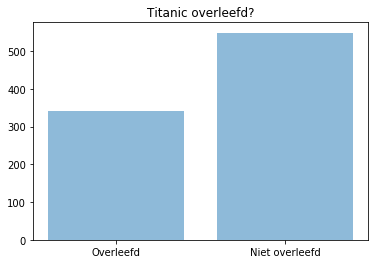

In [38]:
x = ['Overleefd','Niet overleefd']
y = [aantal_overleefd, aantal_niet_overleefd]
y_pos = np.arange(len(y))


plt.bar(y_pos, y, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.title('Titanic overleefd?')

plt.show

Tijd om te gaan kijken naar het geheel. We hebben al eerder gebruik gemaakt van corr() , nu gaan we deze lichtelijk uitbreiden en filteren

In [39]:
df_train_corr = df_train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlatie Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr[(df_train_corr['Correlatie Coefficient']>0.1) & (df_train_corr['Correlatie Coefficient']<1)]


,Feature 1,Feature 2,Correlatie Coefficient
10,Pclass,Fare,0.549500
12,Pclass,Age,0.417667
14,SibSp,Parch,0.414838
16,Pclass,Survived,0.338481
18,Fare,Survived,0.257307
20,Age,SibSp,0.249747
22,Fare,Parch,0.216225
24,Age,Parch,0.176733
26,SibSp,Fare,0.159651
28,Fare,Age,0.124061


De eerste 2 regels zijn al bekend.
De volgende regel zorgt voor enkele resultaten, als we de correlatie tussen Pclass en Fare weten , dan weten we dit ook voor Fare en Pclass. Dit gebeurt door telkens het 1e resultaat te laten vallen en dat telkens per 2 te herhalen. 
We laten dus nummers 1,3,5 etc vallen.
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)

Deze resultaten uit de trainingset zouden overeen moeten komen met de testset



In [40]:
df_test_corr = df_test.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlatie Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr[(df_test_corr['Correlatie Coefficient']>0.1) & (df_test_corr['Correlatie Coefficient']<1)]

,Feature 1,Feature 2,Correlatie Coefficient
10,Pclass,Fare,0.577489
12,Age,Pclass,0.526789
14,Fare,Age,0.345347
16,Parch,SibSp,0.306895
18,Fare,Parch,0.230410
20,SibSp,Fare,0.172032


We kunnen dit nog visueel aantrekkelijker maken met behulp van een heatmap:

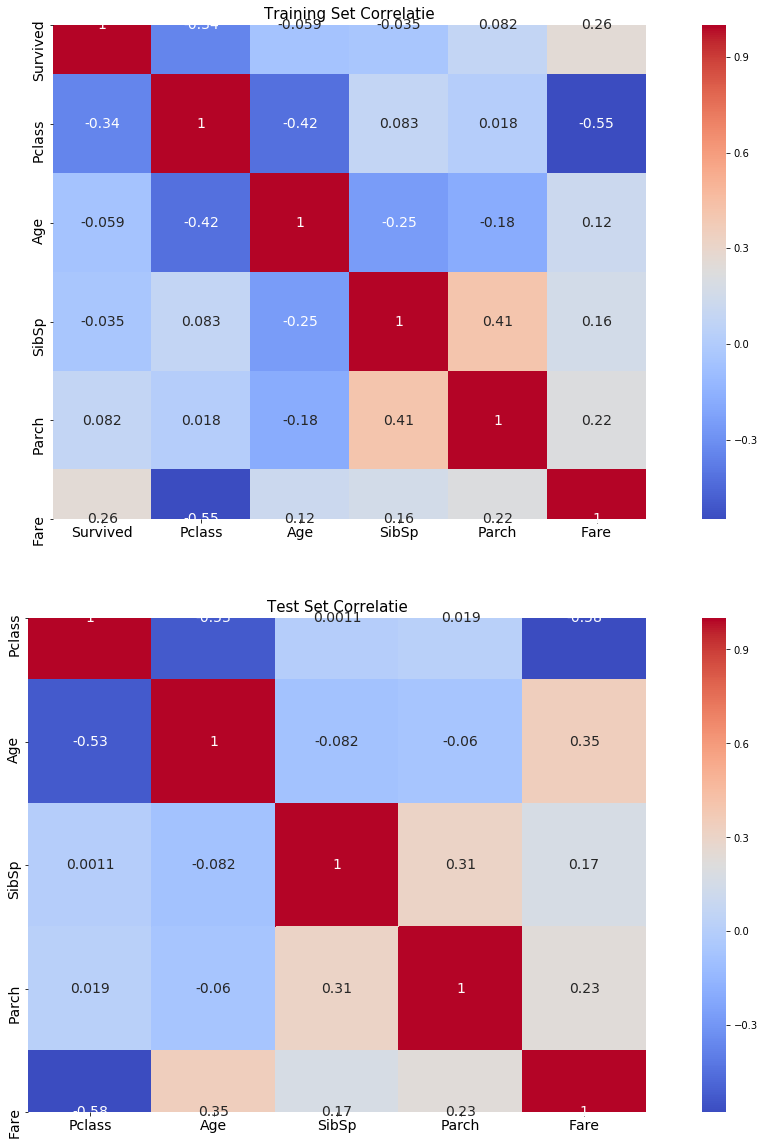

In [41]:
import seaborn as sns
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))

sns.heatmap(df_train.drop(['PassengerId','index'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(df_test.drop(['PassengerId','index'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Training Set Correlatie', size=15)
axs[1].set_title('Test Set Correlatie', size=15)

plt.show()

of iets beknopter met het volgende : 

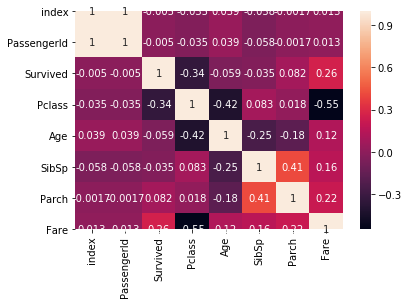

In [42]:
import seaborn as sns

Var_Corr = df_train.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

We krijgen hiermee al iets meer inzicht maar het vergelijken blijft lastig. Wellicht wordt het wat duidelijker als we per feature kijken.

## Continu waarden

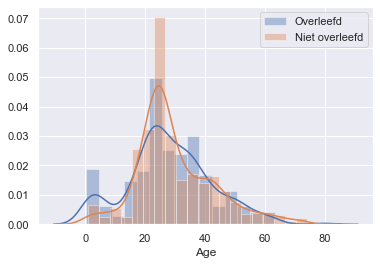

In [43]:
sns.set();

x1 = df_train.loc[df_train['Survived'] == 1, 'Age']
x2 = df_train.loc[df_train['Survived'] == 0, 'Age']
ax = sns.distplot(x1,label = 'Overleefd')
ax = sns.distplot(x2,label = 'Niet overleefd')
    
plt.legend();

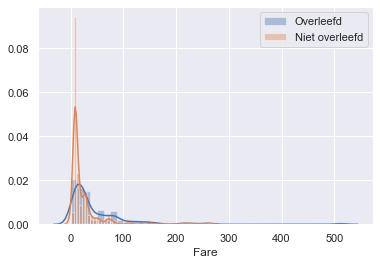

In [44]:
x1 = df_train.loc[df_train['Survived'] == 1, 'Fare']
x2 = df_train.loc[df_train['Survived'] == 0, 'Fare']
ax = sns.distplot(x1,label = 'Overleefd')
ax = sns.distplot(x2,label = 'Niet overleefd')
    
plt.legend();

De gegevens hier zijn echter lastig te interpreteren door de verspreiding in de Fare waarde. Zowel verticaal als horizontaal.

## Categorische waarden

Voor de categorische waarden, gebruiken we een verzameld overzicht ipv de losse plots die hierboven zijn gebruiken. 

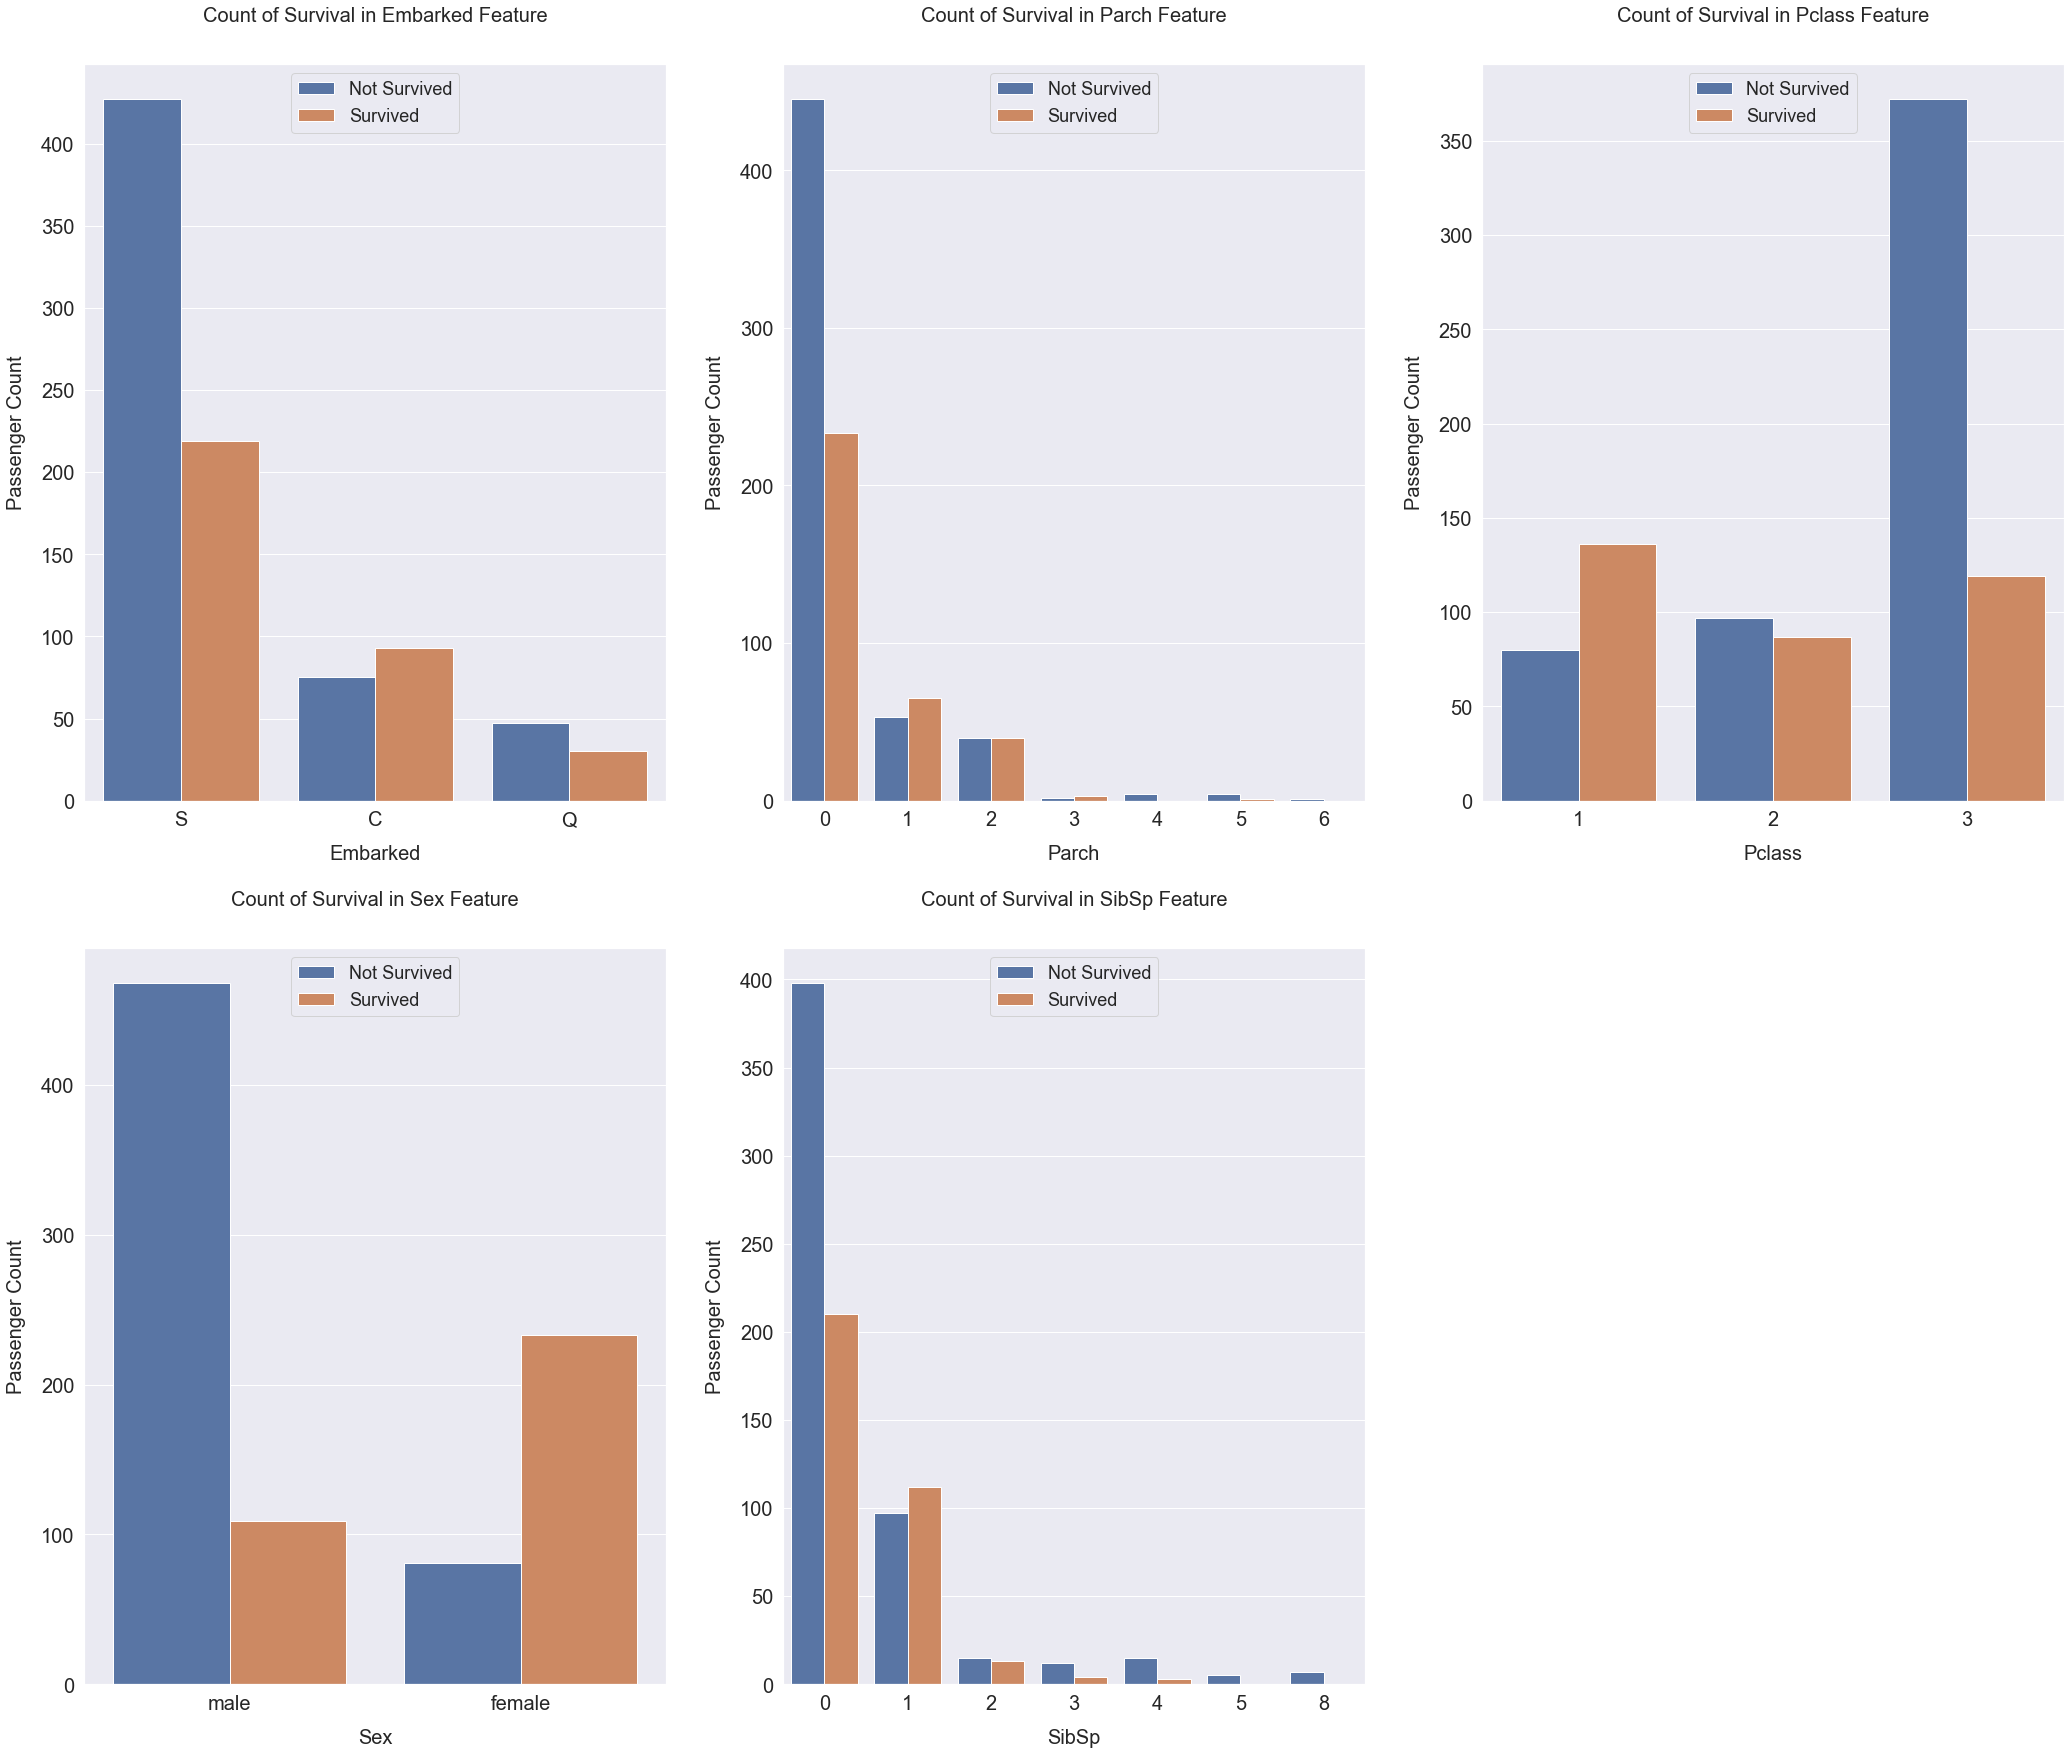

In [45]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

Bovenstaande kan verwarring opleveren en heeft wat toelichting nodig :

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
* we gebruiken de variabele ax voor meerdere assen

plt.subplots_adjust(right=1.5, top=1.25)

* kleine aanpassing van de plots zodat er meer ruimte voor ontstaat. Zonder deze aanpassing lopen de plots over elkaar heen.

for i, feature in enumerate(cat_features, 1):    

* Enumerate is een ingebouwde functie in Python die wellicht niet vaak voorbij komt , het is een for loop met een automatische teller. In dit geval loopt de for loop de cat_features af en begint de teller bij 1 (opgeslagen in i)

plt.subplot(2, 3, i)

* maak het overzicht bestaan uit 2 rijen, 3 kolommen

sns.countplot(x=feature, hue='Survived', data=df_train)

* de plot wordt daadwerkelijk opgesteld, de feature word ingeladen (x), de onderscheidende feature vastgesteld(Survived) en de beschikbare dataset (df_train)    

Wat maken we hieruit op als we kijken naar de losse features : 
- Embarked in C geeft je de beste kans op overleven, Southampton verhoudingsgewijs veruit de slechtste
- Het hebben van een ouder of kind aan boord , verhoogt je kans (maar dit neemt af na 1)
- Hoe hoger de klasse , hoe beter je overlevingskans
- Vrouwen hebben een hogere kans op overleving
- Het hebben van 1 broer/zus of man/vrouw verhoogt je overlevingskans

Nu is SibSp mogelijkerwijs meer verbonden met Sex als de andere maar we hebben al eerder gezien dat er een hoge verbondenheid is tussen de verschillende features.

# Feature Engineering

Feature engineering is een stuk waar je zelf een hoop invloed kan uitoefenen. Hier gaan we de beschikbare ruwe data aanpassen zodat dit beter kan worden geinterpreteerd kan worden door ons model.

## Continu Features

We hebben al eerder gezien dat we een verdeling hebben tussen Continu en Categorische waarden. Continu waarden zijn lastig te tackelen voor een model en daarom gaan we gebruik maken van binning voor Fare en Age.

### Fare

op dit moment hebben we 281 unieke Fare waarden, wat het statistisch wat lastig maakt. We kunnen ze groeperen op 2 manieren ; cut en qcut. 
Cut geeft ons de controle over de bins waar ze worden ingeplaatst, we kunnen zelf de range hiervan aangeven. 
Qcut daarentegen zorgt voor een gelijke verdeling op basis van kwantielen.

De keuze hier tussen ligt voornamelijk aan de beschikbare domeinkennis. Binnen filmpubliek bijvoorbeeld, zijn leeftijden als 6 ,9, 12+,14 ,16 en 18+ belangrijk waardoor we graag deze specifieke bins willen aangeven. Voor Fare is dit echter niet het geval en kiezen we daarom voor Qcut.

We hebben 1309 records , 100 records in een bin klinkt goed dus zetten we het aantal bins op 13

In [46]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13,labels=False)

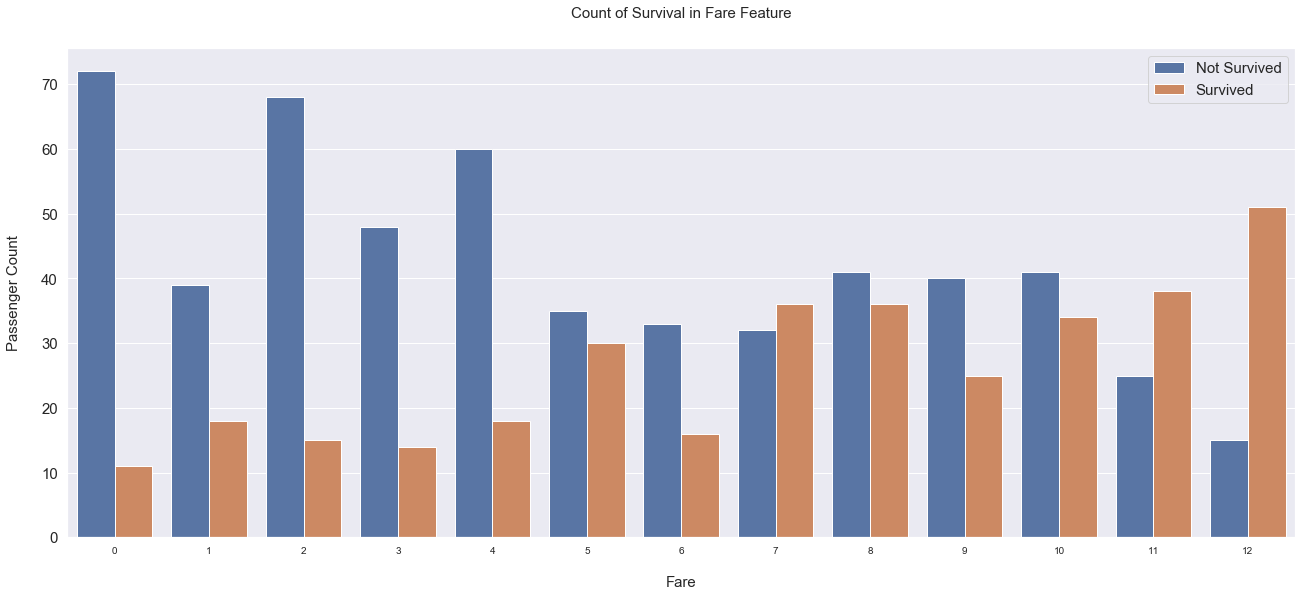

In [47]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

### Age

Als we kijken naar de voorgaande distributie, dan zien we dat dit niet een "normaal distributie" is. Voor de vergelijking , zien we hier een normaal distributie:

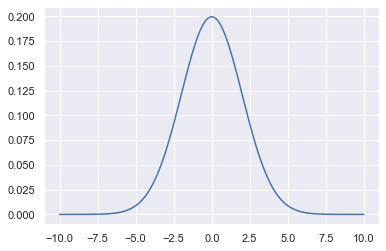

In [48]:
from scipy.stats import norm
x_axis = np.arange(-10, 10, 0.001)
plt.plot(x_axis, norm.pdf(x_axis,0,2))
plt.show()

en hier onze Age distributie :

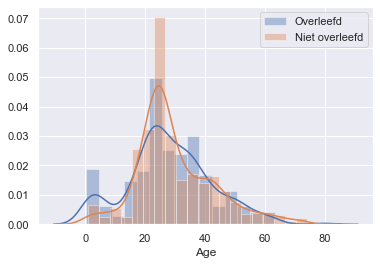

In [49]:
x1 = df_train.loc[df_train['Survived'] == 1, 'Age']
x2 = df_train.loc[df_train['Survived'] == 0, 'Age']
ax = sns.distplot(x1,label = 'Overleefd')
ax = sns.distplot(x2,label = 'Niet overleefd')
    
plt.legend();

We zien dat deze vergelijking wel in de buurt komt maar dat er een aantal pieken en dalen zijn en dat het toppunt , aan de linkerzijde ligt. Als we dit gaan binnen , zullen we dit ook verwachten.

Het aantal records is nog steeds 1309, dit zorgt er echter voor dat de Bin randen niet meer uniek zijn. We slaan even het wiskundige verhaal hier over en kiezen ervoor om het aantal Bins te verlagen om dit probleem te ontwijken

In [50]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)

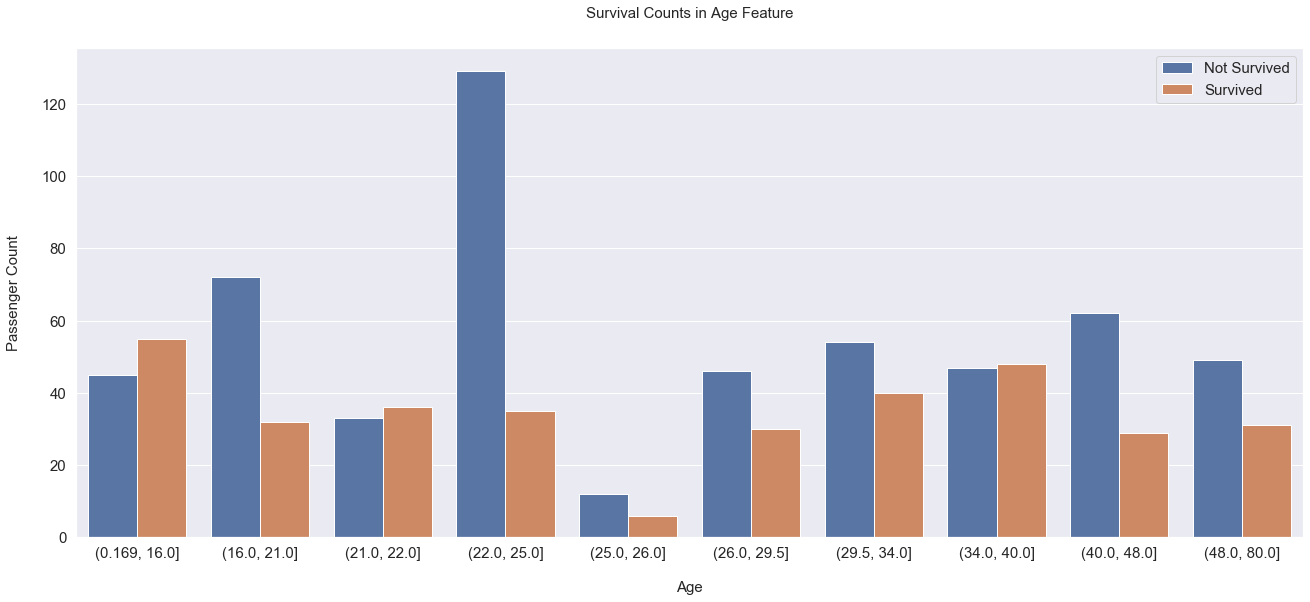

In [51]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

Ook hier zien we zoals verwacht een helling naar links en pieken bij 16-21 en een dal bij 25-26.
We zien verderop in de verdeling ook een vreemdere waarde : 21-22 en 34-40 hebben een andere verdeling dan zijn naaste buren.

Wanneer we naar overlevingskans kijken, zien we dat je de beste kan hebt bij <16.

## Frequency Encoding

Frequentiecodering is een coderingstechniek die categorische kenmerkwaarden codeert naar hun frequenties

Hierdoor blijft de informatie over de waarden van distributies behouden.

### Familie Grootte

We hebben al eerder gezien dat de grootte van familie , invloed heeft op de overlevingskans. Dit feit is nu verdeeld nu Features : SibSp en Parch. Als beiden het zelfde feit weergeven, dan ontstaat de optie om deze samen te voegen en te kijken naar de gehele familie op het schip.

Hier krijgen we de optie om de bins zelf samen te stellen : 
- Alleen, passagier reist alleen.
- Kleine familie , 2-4 
- Middel familie, 5-6
- Grote famile, 7+

Vergeet bij het samenvoegen van deze 2 Features dus ook niet om de passagier zelf mee te tellen : 

In [52]:
df_all['Familie_grootte'] = df_all['SibSp'] + df_all['Parch'] + 1

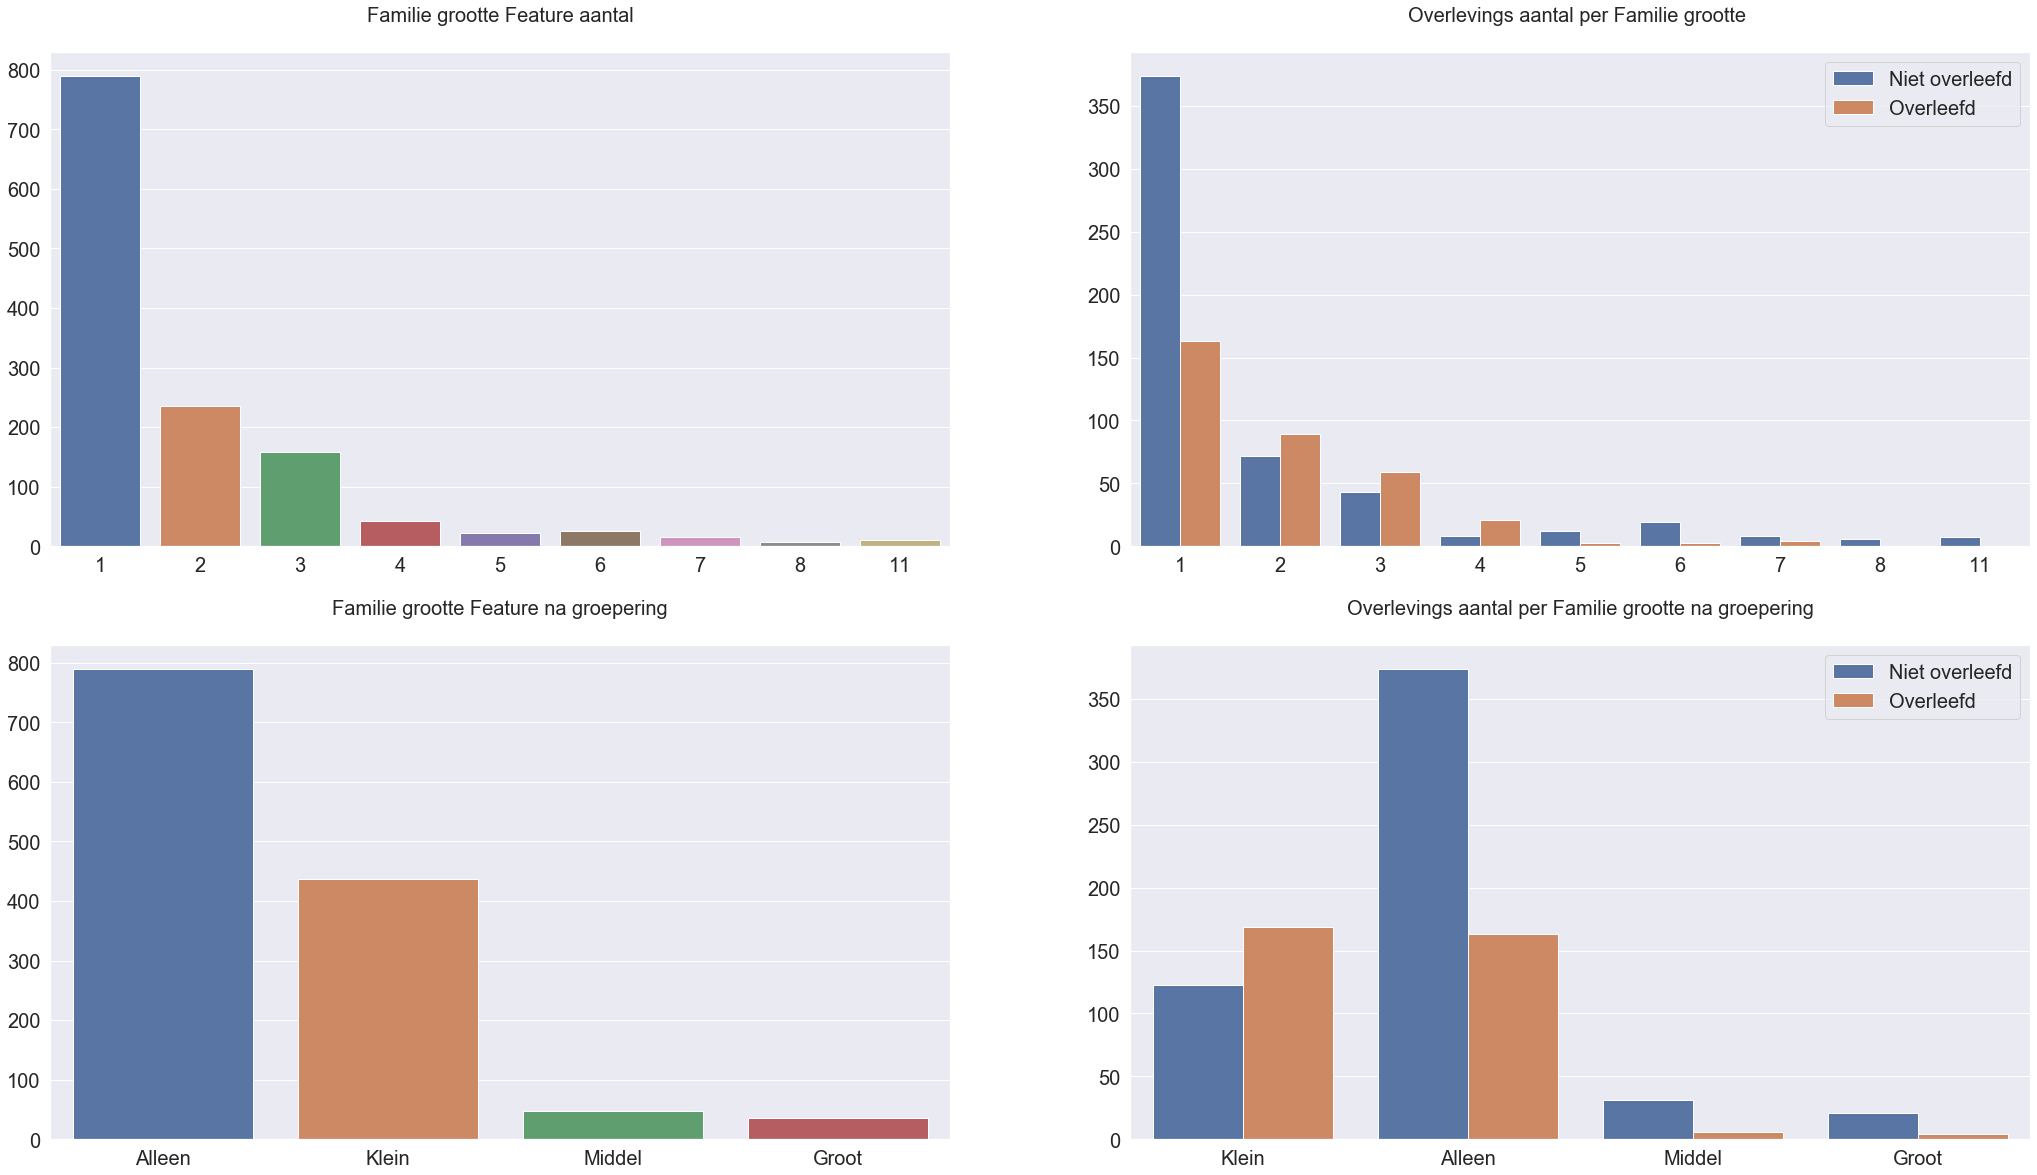

In [53]:
fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Familie_grootte'].value_counts().index, y=df_all['Familie_grootte'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Familie_grootte', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Familie grootte Feature aantal', size=20, y=1.05)
axs[0][1].set_title('Overlevings aantal per Familie grootte ', size=20, y=1.05)

family_map = {1: 'Alleen', 2: 'Klein', 3: 'Klein', 4: 'Klein', 5: 'Middel', 6: 'Middel', 7: 'Groot', 8: 'Groot',9: 'Groot',10: 'Groot', 11: 'Groot'}
df_all['Familie_grootte_Grouped'] = df_all['Familie_grootte'].map(family_map)

sns.barplot(x=df_all['Familie_grootte_Grouped'].value_counts().index, y=df_all['Familie_grootte_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Familie_grootte_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Familie grootte Feature na groepering', size=20, y=1.05)
axs[1][1].set_title('Overlevings aantal per Familie grootte na groepering', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Niet overleefd', 'Overleefd'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

Bovenstaande code lijkt erg uitgebreid maar is erg vergelijkbaar met de subplots die we eerder hebben gezien.
De verschillen hierbij echter zijn : 
- axs[rij][kolom] hiermee worden plots per locatie direct aangesproken
- map zorgt ervoor dat we alle waarden, opnieuw kunnen coderen of veranderen van waarden

### Ticket

De eerste gedachte voor het encoden van Ticket zou zijn om het dezelfde behandeling te geven als Familie_grootte. Hier komen we echter een probleem tegen : Families hebben vaak hetzelfde ticketnummer en als we dit opnieuw zouden binnen , zouden we bijna dezelfde Feature maken als Familie_grootte waardoor het zijn waarde verliest. Er is hier wel een verschil die we al eerder zijn tegen gekomen : Mrs Martha Evelyn Stone. 

Ze blijkt opgestapt te zijn in Southampton samen met haar bediende Amelie Icard , op hetzelfde ticket nummer.

We kiezen er in dit geval dus voor om deze tickets op te tellen in frequentie ipv grouperingen te maken. Dit zal echter wel een vergelijkbare uitkomst geven als Familie_grootte.

In [54]:
df_all['Ticket_Frequentie'] = df_all.groupby('Ticket')['Ticket'].transform('count')

Hierboven zien we meerdere stappen in 1 : 
- groupeer alles op Ticketnummer
- tel de frequentie van het Ticketnummer op
- geef deze aantallen terug en sla deze op in Ticket_Frequentie

Waardoor we onderstaande krijgen : 

In [55]:
df_all['Ticket_Frequentie'].head(10)

0    1
1    2
2    1
3    2
4    1
5    1
6    2
7    5
8    3
9    2
Name: Ticket_Frequentie, dtype: int64

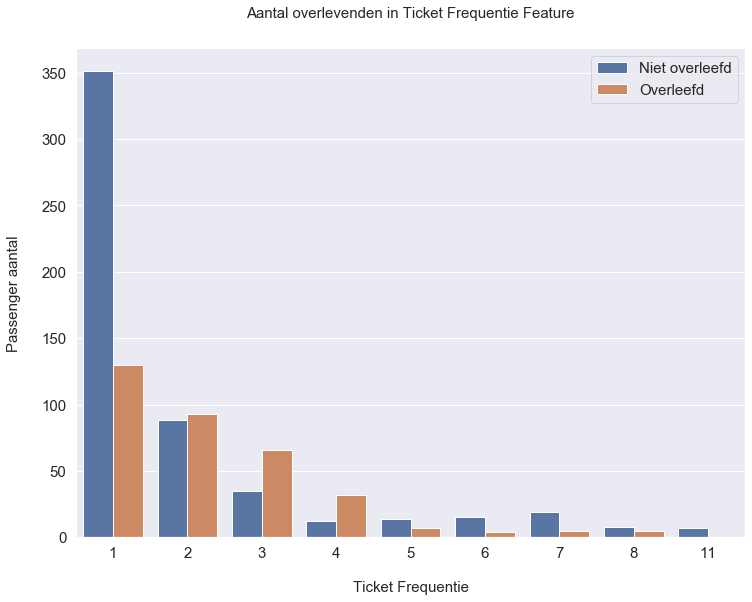

In [56]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequentie', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequentie', size=15, labelpad=20)
plt.ylabel('Passenger aantal', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Niet overleefd', 'Overleefd'], loc='upper right', prop={'size': 15})
plt.title('Aantal overlevenden in {} Feature'.format('Ticket Frequentie'), size=15, y=1.05)

plt.show()

Zoals we al eerder dachten , we zien hier een zelfde vergelijking als we zagen met Familie_grootte met wat subtiele verschillen

### Namen

Normaal gezien worden Features als Name, snel afgedaan als niet nuttig. Deze dataset komt echter uit een tijd, waar er meer informatie te winnen was uit een naam. We hebben hier al naar gekeken bij de Dataset Verkenning, nu is het de tijd om hier iets mee te gaan doen.

Eerst zullen we deze titels moeten verzamelen maar gelukkig zijn de namen altijd hetzelfde opgebouwd : achternaam,titel. voornamen

Dit zorgt ervoor dat we een simpele split kunnen gebruiken ; na ',' tot '.'

In [57]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [58]:
df_all['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

We zien hier nog wel een aantal "dubbelen" zoals Miss, Mrs, Ms, Mlle, Lady, Mme, the Countess en Dona.
Laten we deze later vervangen door Miss/Mrs/Ms.


De overeenkomst in deze titels zijn het geslacht, het verschil is of ze getrouwd zijn of niet.
We gaan er eerst vanuit dat niemand getrouwd is : 

In [59]:
df_all['Is_Married'] = 0

In [60]:
df_all.head(5)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familie_grootte,Familie_grootte_Grouped,Ticket_Frequentie,Title,Is_Married
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,"(21.0, 22.0]",1,0,A/5 21171,0,S,2,Klein,1,Mr,0
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(34.0, 40.0]",1,0,PC 17599,11,C,2,Klein,2,Mrs,0
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,"(25.0, 26.0]",0,0,STON/O2. 3101282,3,S,1,Alleen,1,Miss,0
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(34.0, 40.0]",1,0,113803,10,S,2,Klein,2,Mrs,0
4,4,5,0.0,3,"Allen, Mr. William Henry",male,"(34.0, 40.0]",0,0,373450,3,S,1,Alleen,1,Mr,0


We weten echter dat alle vrouwen met als titel Mrs. wel getrouwd zijn (deze actie geeft een warning die niet helemaal juist is , met het eerste commando worden deze warnings tegengehouden :

In [61]:
pd.set_option('mode.chained_assignment', None)

df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

Bij de overige vrouwelijke titels, is er niet na te gaan of zij wel of niet getrouwd zijn.

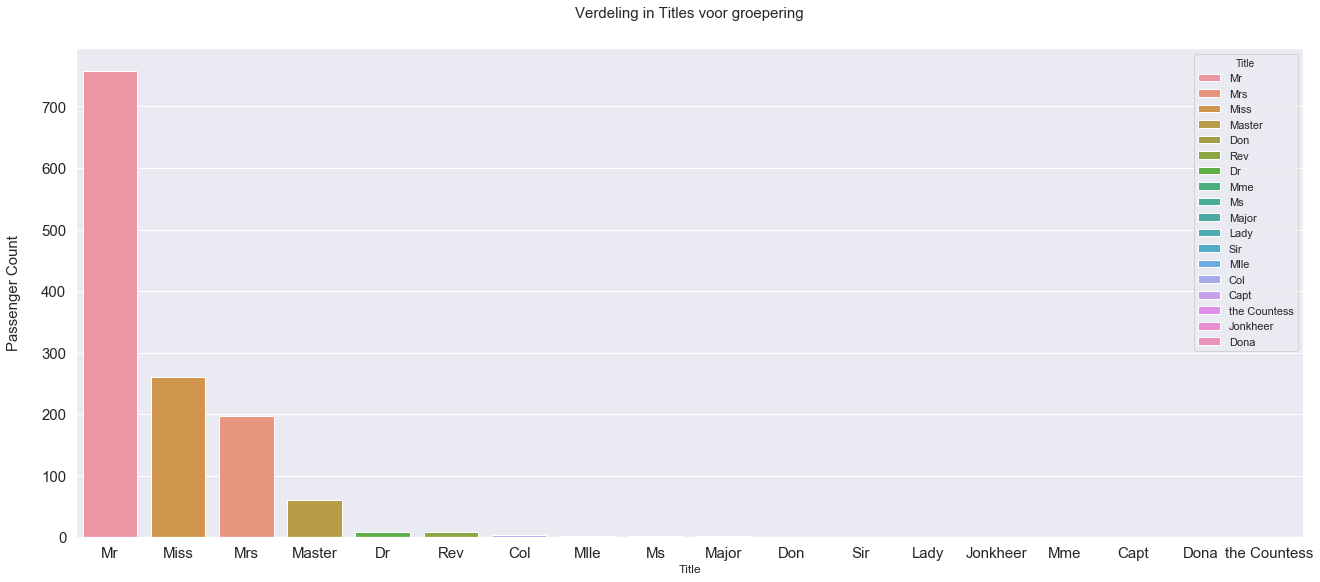

In [62]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Title', hue='Title', data=df_all,dodge=False,order = df_all['Title'].value_counts().index)

plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.title('Verdeling in Titles voor groepering'.format('Age'), size=15, y=1.05)

plt.show()

We gaan alle titels wat samenvoegen. De vele vrouwelijke titels vervangen we door Miss/Mrs/Ms en alle mannelijke "extra" titels met Dr/Military/Noble/Clergy 

In [63]:
df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

Wat is onze verdeling nu?

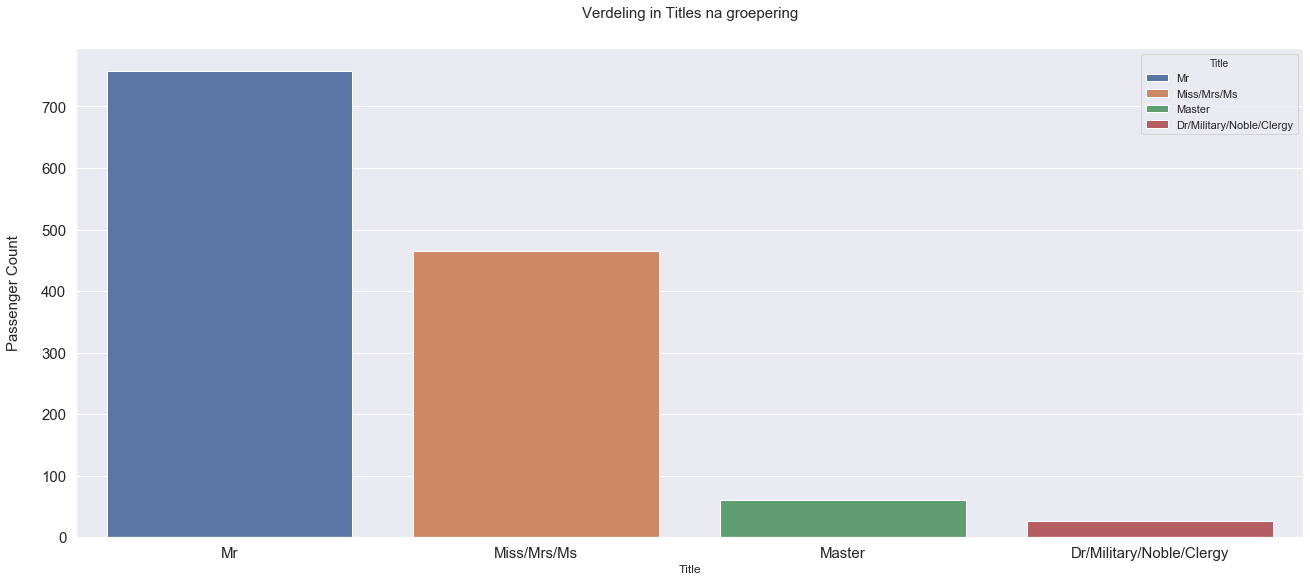

In [64]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Title', hue='Title', data=df_all,dodge=False,order = df_all['Title'].value_counts().index)

plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.title('Verdeling in Titles na groepering'.format('Age'), size=15, y=1.05)

plt.show()

Dit is alweer een stuk leesbaarder.

# 3.3 Feature Transformatie

Zoals je misschien wel weet, kunnen we geen tekst in onze gegevens opnemen als we er een model op gaan trainen. Dus voordat we een model kunnen trainen, moeten we deze gegevens gereed maken voor het model. Dit betekent dat we 'Embarked', 'Sex', 'Title', 'Familie_grootte_Grouped' en 'Ticket' moeten transformeren. Daarnaast willen we graag dat het model continuiteit ziet in 'Pclass','Age' en 'Fare'. Wat we hiervoor gaan gebruiken is get_dummies. Wat dit doet is het opdelen van de mogelijkheden in kolommen : 

Pclass heeft 3 opties ; 1,2 en 3.

get_dummies maakt hier 3 kolommen van met als enkele mogelijke waarde 1 of 0.

In [65]:
features = ['Pclass','Embarked', 'Sex', 'Title', 'Familie_grootte_Grouped','Age','Fare','Ticket']
df_all = pd.get_dummies(df_all,columns=features)

We droppen de ongebruikte features 'index' en 'Name'

In [66]:
df_all = df_all.drop(['index','Name'], axis=1)

Tijd om df_all weer uit elkaar te halen.
'Survived' is door het samenvoegen train en test (int en NaN) een float geworden. We hebben echter een int nodig voor onze eindresultaat, deze moeten we dus ook weer terugvormen

In [67]:
df_train = df_all[df_all['Survived'].notnull()]
df_test = df_all[df_all['Survived'].isnull()]
df_test = df_test.drop(['Survived'], axis=1)

In [68]:
df_train["Survived"] = df_train["Survived"].astype(int)

Hoe ziet onze trainingsset er ondertussen uit?

In [69]:
df_train.head(5)

,PassengerId,Survived,SibSp,Parch,Familie_grootte,Ticket_Frequentie,Is_Married,Pclass_1,Pclass_2,Pclass_3,...,Ticket_W./C. 14258,Ticket_W./C. 14260,Ticket_W./C. 14263,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,1,0,1,0,2,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,2,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,0,2,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Model

Tijd om ons model te gaan trainen!

Ons plan ziet er als volgt uit : 

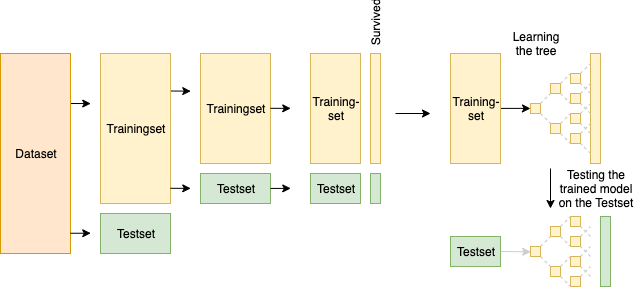

We gaan onze trainingset opdelen zodat we hiermee ons model kunnen trainen.
Dit opdelen gaan we doen door middel van train_test_split.
De trainingsset gaat in 4 delen worden opgedeeld : 
- Training word allereerst verdeeld Train_split en Test_split
- Deze twee sets worden weer verder opgedeeld in een X en Y

Het model wordt eerst getrained op Xtrain , die met de data van Xtrain , Ytrain probeert te voorspellen.
Daarna wordt hier een score aan gehangen, zodat we een indicatie krijgen van de accuraatheid.

In [70]:
from sklearn.model_selection import train_test_split
train_split, test_split = train_test_split(df_train, test_size=0.3)
print(len(train_split),len(test_split))

xtrain = train_split.drop(['Survived'], axis=1)
ytrain = train_split.Survived
xtest = test_split.drop(['Survived'], axis=1)
ytest = test_split.Survived

623 268


Als model heb ik hier gekozen voor een simpel model ; een enkele Decision Tree.
Deze geven we onze trainingsdata om mee te oefenen (met onze xtrain proberen we ytrain te voorspellen).

In [71]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Het model is nu getrained met onze xtrain data. We gaan nu het andere gedeelte uit df_train gebruiken (xtest) die het model nog niet eerder gezien heeft maar waarvan we WEL de uitkomst met zekerheid weten (ytest).

In [72]:
ypred = decision_tree.predict(xtest)
acc_decision_tree = round(decision_tree.score(xtest,ytest) * 100,2)
dec_par = decision_tree.get_params()
print(acc_decision_tree,"%")

82.09 %


We hebben een erg mooie score verkregen!
Tijd om dit model nu te gaan gebruiken voor onze test set.

In [73]:
ypred = decision_tree.predict(df_test)

## Submission

De gegevens die Kaggle van ons wil hebben zijn het PassengerId en Survived :

In [74]:
submission = pd.DataFrame({"PassengerId": df_test["PassengerId"],"Survived": ypred})

Dit geeft ons het volgende resultaat:

In [75]:
submission

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


Dit dataframe moet nu worden opgeslagen als CSV, zodat deze kan worden geupload naar Kaggle:

In [76]:
submission.to_csv (r'/Users/mikedroog/Desktop/export.csv', index = False, header=True)